# Data Anayltics Project - Students Performance

### Introduction

>This project focuses on the analysis of the kaggle dataset Students Performance in Exams. The dataset contists of marks scored by students in various subjects. The objective of this analysis is to understand how different factors affect the outcome of the student's performance.

In [67]:
#import libraries
import pandas as pd

#Load the dataset
studentsPerformance = pd.read_csv('StudentsPerformance.csv')

Essentially, any useful analysis or decision-making process starts with data cleaning. By guaranteeing that the data is correct, consistent, and free from mistakes or inconsistencies, it makes sure that conclusions and judgments are well-informed.

In [68]:
studentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
print(studentsPerformance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [70]:
print(studentsPerformance.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [71]:
studentsPerformance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [94]:
print(studentsPerformance.duplicated().sum())

0


My conclusion is that the dataset is clean based on the information gathered from all of the above phases.


## Data Transformation

>Data Transformation prepares data for analysis, helps in creating more robust and accurate models, and ensures that the assumptions of various statistical methods are met, leading to more reliable results.

In [72]:
studentsPerformance.rename(columns={'race/ethnicity': 'race',
                  'parental level of education': 'parents_education',
                  'test preparation course': 'test_preparation',
                  'math score': 'math_score',
                  'reading score': 'reading_score',
                  'writing score': 'writing_score'}, inplace=True)

In [73]:
print(studentsPerformance.columns.tolist())


['gender', 'race', 'parents_education', 'lunch', 'test_preparation', 'math_score', 'reading_score', 'writing_score']




The code below demonstrates how to split the data into features and the target variable "math_score," as well as how to perform one-hot encoding for categorical variables and create a new feature called "total_score."

In [74]:
corrected_columns = ['gender', 'race', 'parents_education', 'lunch', 'test_preparation', 'math_score', 'reading_score', 'writing_score']

studentsPerformance.columns = corrected_columns

selected_data = studentsPerformance[['gender', 'race', 'parents_education', 'lunch', 'test_preparation', 'math_score', 'reading_score', 'writing_score']]

selected_data.loc[:, 'total_score'] = selected_data['reading_score'] + selected_data['writing_score'] + selected_data['math_score']
selected_data.drop(['reading_score', 'writing_score'], axis=1, inplace=True)

features = selected_data.drop('math_score', axis=1)
target = selected_data['math_score']

print(features.head())
print(target.head())


   gender     race   parents_education         lunch test_preparation  \
0  female  group B   bachelor's degree      standard             none   
1  female  group C        some college      standard        completed   
2  female  group B     master's degree      standard             none   
3    male  group A  associate's degree  free/reduced             none   
4    male  group C        some college      standard             none   

   total_score  
0          218  
1          247  
2          278  
3          148  
4          229  
0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64


## Data Mining


Data mining involves analyzing large datasets to discover patterns, correlations, and insights that might not be immediately apparent.

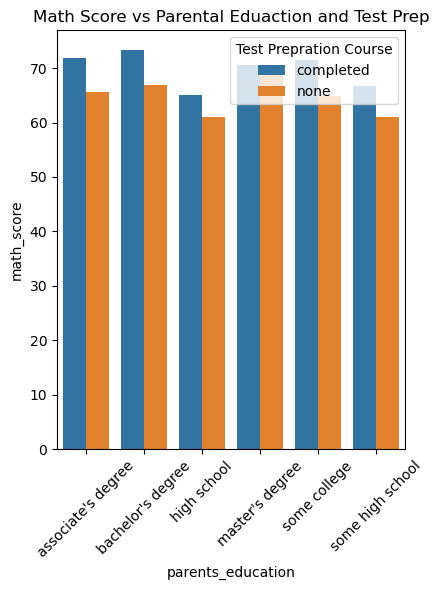

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_data = studentsPerformance[['parents_education', 'test_preparation', 'math_score', 'reading_score', 'writing_score']]

#grouping parental education level and test preperation

grouped_data = selected_data.groupby(['parents_education', 'test_preparation']).mean().reset_index()

plt.figure(figsize=(12,6))

#Comparing Math Score vs Parental Education Level and Test Preparation
plt.subplot(1,3,1)
sns.barplot(x='parents_education', y="math_score",hue="test_preparation", data=grouped_data)
plt.title('Math Score vs Parental Eduaction and Test Prep')
plt.xticks(rotation=45)
plt.legend(title='Test Prepration Course',loc='upper right')

plt.tight_layout()
plt.show()

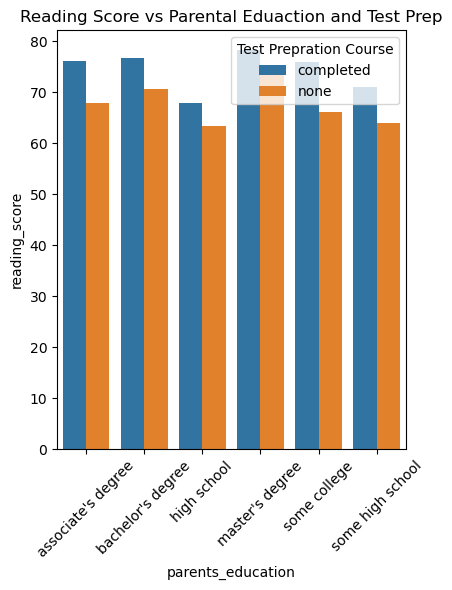

In [77]:
plt.figure(figsize=(12,6))

#Comparing Reading Score vs Parental Education Level and Test Preparation
plt.subplot(1,3,2)
sns.barplot(x='parents_education', y="reading_score",hue="test_preparation", data=grouped_data)
plt.title('Reading Score vs Parental Eduaction and Test Prep')
plt.xticks(rotation=45)
plt.legend(title='Test Prepration Course',loc='upper right')

plt.tight_layout()
plt.show()

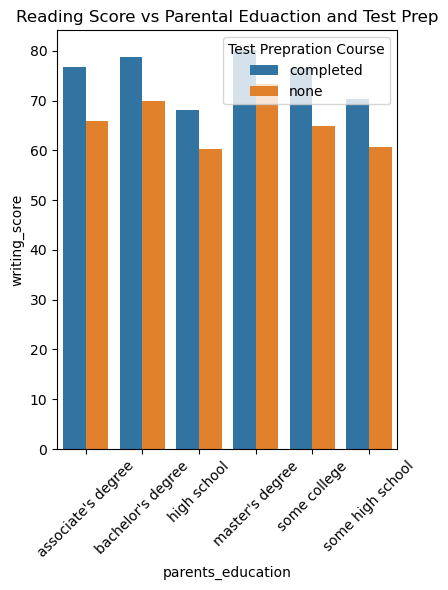

In [78]:
plt.figure(figsize=(12,6))

#Comparing Writing Score vs Parental Education Level and Test Preparation
plt.subplot(1,3,3)
sns.barplot(x='parents_education', y="writing_score",hue="test_preparation", data=grouped_data)
plt.title('Reading Score vs Parental Eduaction and Test Prep')
plt.xticks(rotation=45)
plt.legend(title='Test Prepration Course',loc='upper right')

plt.tight_layout()
plt.show()

## Regression using Apriori

In [13]:
print(studentsPerformance.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score', 'math score']


In [79]:
%pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

transactions = []
for index, row in studentsPerformance.iterrows():
    items = []
    items.append('Math_' + str(row['math_score']))  
    items.append('Reading_' + str(row['reading_score']))  
    items.append('Writing_' + str(row['writing_score']))
    transactions.append(items)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,Math_0,Math_100,Math_18,Math_19,Math_22,Math_23,Math_24,Math_26,Math_27,Math_28,...,Writing_90,Writing_91,Writing_92,Writing_93,Writing_94,Writing_95,Writing_96,Writing_97,Writing_98,Writing_99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=False, max_len=None, verbose=0, low_memory=False)
frequent_itemsets.head(7)

,support,itemsets
0,0.007,(1)
1,0.003,(10)
2,0.003,(12)
3,0.005,(15)
4,0.004,(17)
5,0.003,(18)
6,0.004,(19)


In [81]:
rules = association_rules(frequent_itemsets, metric="confidence")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(164),(93),0.003,0.006,0.003,1.0,166.666667,0.002982,inf,0.996991
1,"(1, 154)",(81),0.003,0.017,0.003,1.0,58.823529,0.002949,inf,0.985958
2,"(131, 45)",(204),0.003,0.035,0.003,1.0,28.571429,0.002895,inf,0.967904


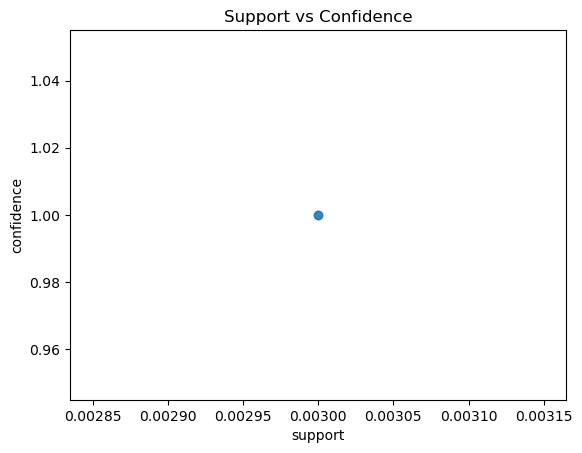

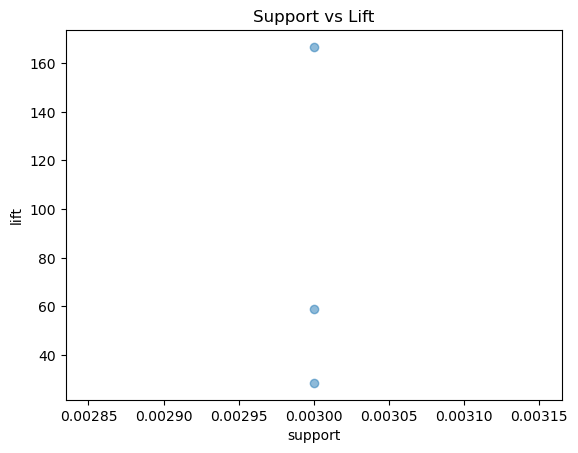

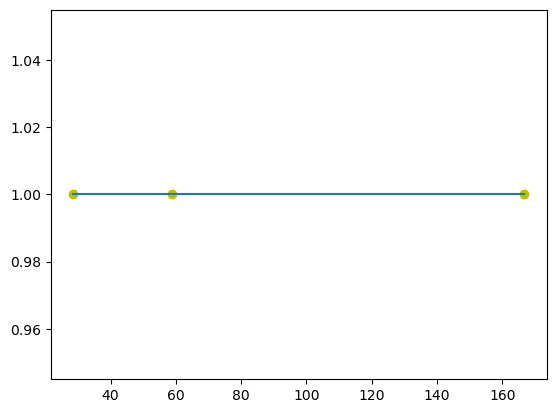

In [82]:
#Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#Support vs Lift

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#Lift vs Confidence

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))

### Regression

The code is to build a linear regression model to understand how math_score is related to the categorical variables parents_education and test_preparation within the studentsPerformance dataset. It helps in analyzing how these categorical factors influence math scores and provides insights into their individual effects on the scores through the estimated coefficients accessed via model1.params.

In [83]:
import statsmodels.formula.api as smf 
model1=smf.ols(formula='math_score ~ C(parents_education) + C(test_preparation)',data=studentsPerformance).fit() 
model1.params


Intercept                                    71.373079
C(parents_education)[T.bachelor's degree]     1.393706
C(parents_education)[T.high school]          -5.282143
C(parents_education)[T.master's degree]       2.031051
C(parents_education)[T.some college]         -0.595939
C(parents_education)[T.some high school]     -4.722161
C(test_preparation)[T.none]                  -5.534453
dtype: float64

In [84]:
model1.pvalues 

Intercept                                    0.000000e+00
C(parents_education)[T.bachelor's degree]    4.064453e-01
C(parents_education)[T.high school]          2.726213e-04
C(parents_education)[T.master's degree]      3.467446e-01
C(parents_education)[T.some college]         6.686773e-01
C(parents_education)[T.some high school]     1.472389e-03
C(test_preparation)[T.none]                  1.878494e-08
dtype: float64

In [85]:
model1.rsquared 

0.0621200153687822

In [86]:
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.96
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           7.54e-12
Time:                        14:46:24   Log-Likelihood:                -4105.2
No. Observations:                1000   AIC:                             8224.
Df Residuals:                     993   BIC:                             8259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    71.3731      1.165     61.288      0.000      69.088      73.658
C(parents_education)[T.bachelor's degree]     1.3937      1.678      0.831      0.406      -1.899       4.687
C(parents_education)[T.high school]          -5.2821      1.446     -3.653      0.000      -8.120      -2.445
C(parents_education)[T.master's degree]       2.0311      2.158      0.941      0.347      -2.203       6.265
C(parents_education)[T.some college]         -0.5959      1.392     -0.428      0.669      -3.328       2.136
C(parents_education)[T.some high school]     -4.7222      1.481     -3.189      0.001      -7.628      -1.816
C(test_preparation)[T.none]                  -5.5345      0.976     -5.669      0.000      -7.450      -3.619
==============================================================================
Omnibus:                       12.413   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.524
Skew:                          -0.270   Prob(JB):                      0.00191
Kurtosis:                       3.098   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
predictors = studentsPerformance[['parents_education', 'test_preparation']]

math_scores_pred = model1.predict(predictors)
math_scores_pred

output = pd.DataFrame({ 'Parental level of education' : predictors['parents_education'],'Test Preparation course' : predictors['test_preparation'], 'Math Score': math_scores_pred })
output.to_csv('Math_scores-predictions.csv', index = False)
output.head()

,Parental level of education,Test Preparation course,Math Score
0,bachelor's degree,none,67.232332
1,some college,completed,70.777140
2,master's degree,none,67.869677
3,associate's degree,none,65.838625
4,some college,none,65.242686


The code uses a scatter plot to graphically represent the relationship between predicted maths scores and parental education levels. It aims to show any possible trends or patterns in the predicted scores regarding different parental education backgrounds by plotting the predicted maths scores against the various parental education levels. With regard to various parental education levels, this graph aids in understanding how the predictive model's estimated scores fluctuate, offering insights into the possible influence of parental education on predicted math scores.

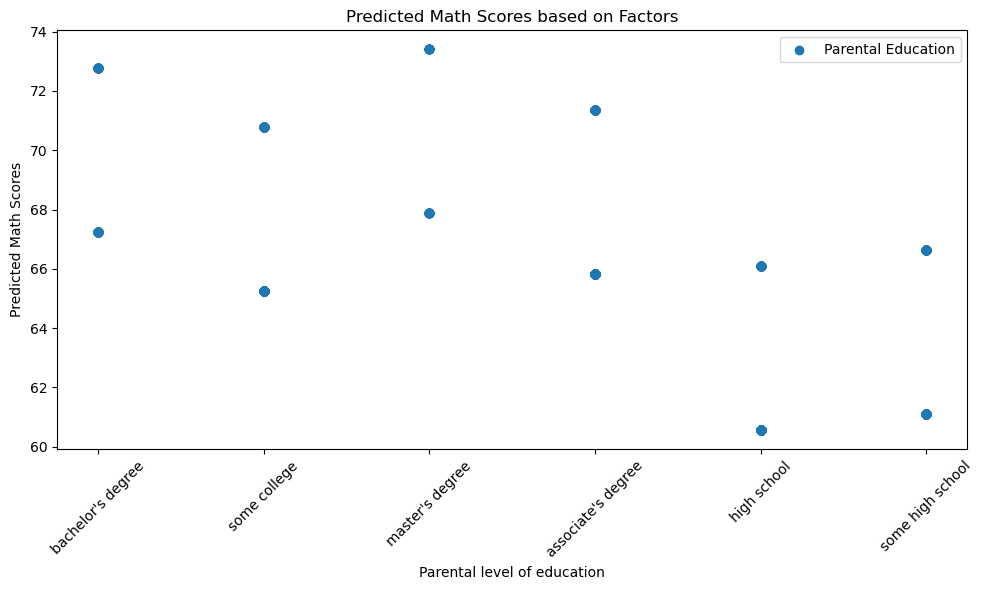

In [89]:
predicted_data = studentsPerformance[['parents_education', 'test_preparation']].copy()
predicted_data['math_scores_pred'] = math_scores_pred

plt.figure(figsize=(10, 6))

plt.scatter(predicted_data['parents_education'], predicted_data['math_scores_pred'], label='Parental Education')


plt.xlabel('Parental level of education')
plt.ylabel('Predicted Math Scores')
plt.title('Predicted Math Scores based on Parental level of education')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

Similar to the previous scatter plot, this code aims to visually illustrate the relationship between predicted math scores and the levels of test preparation using a scatter plot. By plotting the predicted math scores against the different levels of test preparation, it seeks to showcase any potential trends or patterns in the predicted scores concerning varying levels of preparedness for the test. This visualization helps in understanding how the predictive model's estimated scores change concerning different levels of test preparation, providing insights into the potential impact of test readiness on predicted math scores.







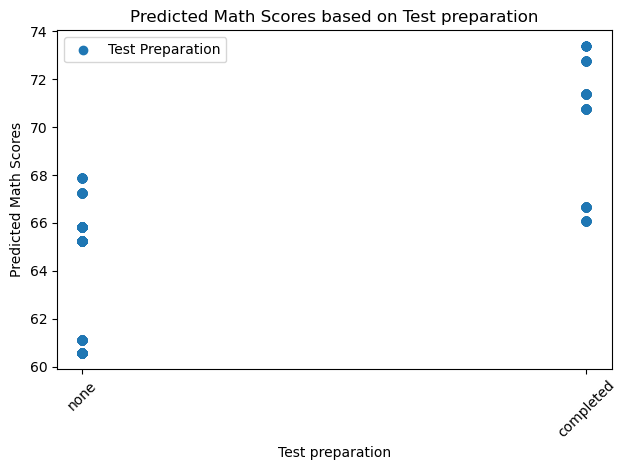

In [93]:
plt.scatter(predicted_data['test_preparation'],predicted_data['math_scores_pred'], label='Test Preparation')

plt.xlabel('Test preparation')
plt.ylabel('Predicted Math Scores')
plt.title('Predicted Math Scores based on Test preparation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

## Conclusion

By analyzing these visual representations, one can infer how the model predicts math scores based on different levels of parental education and test preparation, providing insights into the influence of these factors on the anticipated math scores.